# ============================================================
# TASK 2: Quantitative Analysis with TA-Lib and PyNance
# ============================================================
# Author: Kalkidan Asdesach
# Branch: task-2
# Description:
#   - Load 6 stock CSV files
#   - Calculate technical indicators using TA-Lib
#   - Use PyNance for financial metrics
#   - Visualize trends
# ============================================================

In [2]:
import talib
print(talib.__version__)

0.6.8


1. IMPORT LIBRARIES

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import talib

plt.style.use("seaborn-v0_8")

2. LOAD ALL 6 CSV FILES

In [6]:
# 1. Import os
import os
import pandas as pd

# 2. Path to your data folder
DATA_FOLDER = "../data/stock_data"

# 3. Read all CSVs inside the folder
csv_files = [f for f in os.listdir(DATA_FOLDER) if f.endswith(".csv")]
print("CSV files found:", csv_files)

# 4. Load all CSVs into a dictionary of DataFrames
dfs = {}
for file in csv_files:
    file_path = os.path.join(DATA_FOLDER, file)
    dfs[file] = pd.read_csv(file_path)

# 5. Preview one of the CSVs
dfs[csv_files[0]].head()


CSV files found: ['AAPL.csv', 'AMZN.csv', 'GOOG.csv', 'META.csv', 'MSFT.csv', 'NVDA.csv']


Date     Close      High       Low      Open      Volume
0  2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
1  2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2  2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
3  2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
4  2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800

Preview & Explore Each CSV

In [9]:
for name, df in dfs.items():
    print(f"=== {name} ===")
    display(df.head())
    print(df.info())
    print("\n")


=== AAPL.csv ===


Date     Close      High       Low      Open      Volume
0  2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
1  2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2  2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
3  2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
4  2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3774 non-null   object 
 1   Close   3774 non-null   float64
 2   High    3774 non-null   float64
 3   Low     3774 non-null   float64
 4   Open    3774 non-null   float64
 5   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 177.0+ KB
None


=== AMZN.csv ===


Date  Close    High     Low    Open     Volume
0  2009-01-02  2.718  2.7265  2.5535  2.5675  145928000
1  2009-01-05  2.703  2.7870  2.6515  2.7865  190196000
2  2009-01-06  2.868  2.9110  2.6875  2.7275  221602000
3  2009-01-07  2.810  2.8475  2.7675  2.8145  158854000
4  2009-01-08  2.858  2.8660  2.7290  2.7495  131558000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3774 non-null   object 
 1   Close   3774 non-null   float64
 2   High    3774 non-null   float64
 3   Low     3774 non-null   float64
 4   Open    3774 non-null   float64
 5   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 177.0+ KB
None


=== GOOG.csv ===


Date     Close      High       Low      Open     Volume
0  2009-01-02  7.948608  7.960977  7.557264  7.633949  144961322
1  2009-01-05  8.115089  8.194003  7.792268  7.940692  196293007
2  2009-01-06  8.263762  8.430492  8.074027  8.237046  257971329
3  2009-01-07  7.965677  8.185839  7.885034  8.121770  180453860
4  2009-01-08  8.044340  8.044340  7.850152  7.873406  144567852

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3774 non-null   object 
 1   Close   3774 non-null   float64
 2   High    3774 non-null   float64
 3   Low     3774 non-null   float64
 4   Open    3774 non-null   float64
 5   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 177.0+ KB
None


=== META.csv ===


Date      Close       High        Low       Open     Volume
0  2012-05-18  37.995762  44.724282  37.767172  41.792356  573576400
1  2012-05-21  33.821495  36.435382  32.797807  36.306177  168192700
2  2012-05-22  30.810066  33.384198  30.750434  32.410203  101786600
3  2012-05-23  31.803938  32.300874  31.167860  31.177799   73600000
4  2012-05-24  32.827625  33.006523  31.575347  32.748117   50237200

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2923 entries, 0 to 2922
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2923 non-null   object 
 1   Close   2923 non-null   float64
 2   High    2923 non-null   float64
 3   Low     2923 non-null   float64
 4   Open    2923 non-null   float64
 5   Volume  2923 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 137.1+ KB
None


=== MSFT.csv ===


Date      Close       High        Low       Open    Volume
0  2009-01-02  14.872976  14.924187  14.170662  14.287715  50084000
1  2009-01-05  15.011971  15.121707  14.675444  14.777866  61475200
2  2009-01-06  15.187551  15.363130  15.077815  15.180236  58083400
3  2009-01-07  14.273087  14.843718  14.251139  14.770560  72709900
4  2009-01-08  14.719351  14.770561  14.302350  14.360876  70255400

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3774 non-null   object 
 1   Close   3774 non-null   float64
 2   High    3774 non-null   float64
 3   Low     3774 non-null   float64
 4   Open    3774 non-null   float64
 5   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 177.0+ KB
None


=== NVDA.csv ===


Date     Close      High       Low      Open      Volume
0  2009-01-02  0.199652  0.201027  0.184294  0.184982   497124000
1  2009-01-05  0.203319  0.207904  0.195984  0.197360   705736000
2  2009-01-06  0.210196  0.216156  0.204695  0.209279   657904000
3  2009-01-07  0.197589  0.205382  0.190483  0.205382   870096000
4  2009-01-08  0.192546  0.195067  0.180626  0.195067  1014496000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774 entries, 0 to 3773
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3774 non-null   object 
 1   Close   3774 non-null   float64
 2   High    3774 non-null   float64
 3   Low     3774 non-null   float64
 4   Open    3774 non-null   float64
 5   Volume  3774 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 177.0+ KB
None




In [10]:
for df in dfs.values():
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'])


Clean & Prepare Stock Price Data

In [12]:
print(dfs.keys())

dict_keys(['AAPL.csv', 'AMZN.csv', 'GOOG.csv', 'META.csv', 'MSFT.csv', 'NVDA.csv'])


In [13]:
df_stock = dfs['AAPL.csv']  # use the exact filename
df_stock['Date'] = pd.to_datetime(df_stock['Date'])  # ensure date is datetime
df_stock = df_stock.sort_values('Date')
df_stock.set_index('Date', inplace=True)
df_stock.head()


Close      High       Low      Open      Volume
Date                                                          
2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800

In [14]:
for name, df in dfs.items():
    df['Date'] = pd.to_datetime(df['Date'])
    df.sort_values('Date', inplace=True)
    df.set_index('Date', inplace=True)
    print(f"Processed {name}:")
    display(df.head())

Processed AAPL.csv:


Close      High       Low      Open      Volume
Date                                                          
2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800

Processed AMZN.csv:


Close    High     Low    Open     Volume
Date                                                
2009-01-02  2.718  2.7265  2.5535  2.5675  145928000
2009-01-05  2.703  2.7870  2.6515  2.7865  190196000
2009-01-06  2.868  2.9110  2.6875  2.7275  221602000
2009-01-07  2.810  2.8475  2.7675  2.8145  158854000
2009-01-08  2.858  2.8660  2.7290  2.7495  131558000

Processed GOOG.csv:


Close      High       Low      Open     Volume
Date                                                         
2009-01-02  7.948608  7.960977  7.557264  7.633949  144961322
2009-01-05  8.115089  8.194003  7.792268  7.940692  196293007
2009-01-06  8.263762  8.430492  8.074027  8.237046  257971329
2009-01-07  7.965677  8.185839  7.885034  8.121770  180453860
2009-01-08  8.044340  8.044340  7.850152  7.873406  144567852

Processed META.csv:


Close       High        Low       Open     Volume
Date                                                             
2012-05-18  37.995762  44.724282  37.767172  41.792356  573576400
2012-05-21  33.821495  36.435382  32.797807  36.306177  168192700
2012-05-22  30.810066  33.384198  30.750434  32.410203  101786600
2012-05-23  31.803938  32.300874  31.167860  31.177799   73600000
2012-05-24  32.827625  33.006523  31.575347  32.748117   50237200

Processed MSFT.csv:


Close       High        Low       Open    Volume
Date                                                            
2009-01-02  14.872976  14.924187  14.170662  14.287715  50084000
2009-01-05  15.011971  15.121707  14.675444  14.777866  61475200
2009-01-06  15.187551  15.363130  15.077815  15.180236  58083400
2009-01-07  14.273087  14.843718  14.251139  14.770560  72709900
2009-01-08  14.719351  14.770561  14.302350  14.360876  70255400

Processed NVDA.csv:


Close      High       Low      Open      Volume
Date                                                          
2009-01-02  0.199652  0.201027  0.184294  0.184982   497124000
2009-01-05  0.203319  0.207904  0.195984  0.197360   705736000
2009-01-06  0.210196  0.216156  0.204695  0.209279   657904000
2009-01-07  0.197589  0.205382  0.190483  0.205382   870096000
2009-01-08  0.192546  0.195067  0.180626  0.195067  1014496000

Calculate Technical Indicators

Simple Moving Average (SMA)

In [15]:
df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)


Exponential Moving Average (EMA)

In [16]:
df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)
df['EMA_50'] = talib.EMA(df['Close'], timeperiod=50)


Relative Strength Index (RSI)

In [17]:
df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)


MACD (Moving Average Convergence Divergence)

In [18]:
df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'])


Bollinger Bands

In [19]:
df['ATR_14'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)

In [20]:
import talib

for name, df in dfs.items():
    df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
    df['EMA_20'] = talib.EMA(df['Close'], timeperiod=20)
    df['RSI_14'] = talib.RSI(df['Close'], timeperiod=14)
    df['MACD'], df['MACD_signal'], df['MACD_hist'] = talib.MACD(df['Close'])
    df['BB_upper'], df['BB_middle'], df['BB_lower'] = talib.BBANDS(df['Close'])
    df['ATR_14'] = talib.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)
    print(f"Indicators calculated for {name}")


Indicators calculated for AAPL.csv
Indicators calculated for AMZN.csv
Indicators calculated for GOOG.csv
Indicators calculated for META.csv
Indicators calculated for MSFT.csv
Indicators calculated for NVDA.csv


Import plotting libraries

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")


Visualize Close Price + Moving Averages

In [23]:
import talib

df['SMA_20'] = talib.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = talib.SMA(df['Close'], timeperiod=50)  # make sure this line ran


In [24]:
print(df.columns)


Index(['Close', 'High', 'Low', 'Open', 'Volume', 'SMA_20', 'EMA_20', 'RSI_14',
       'MACD', 'MACD_signal', 'MACD_hist', 'BB_upper', 'BB_middle', 'BB_lower',
       'ATR_14', 'SMA_50'],
      dtype='object')


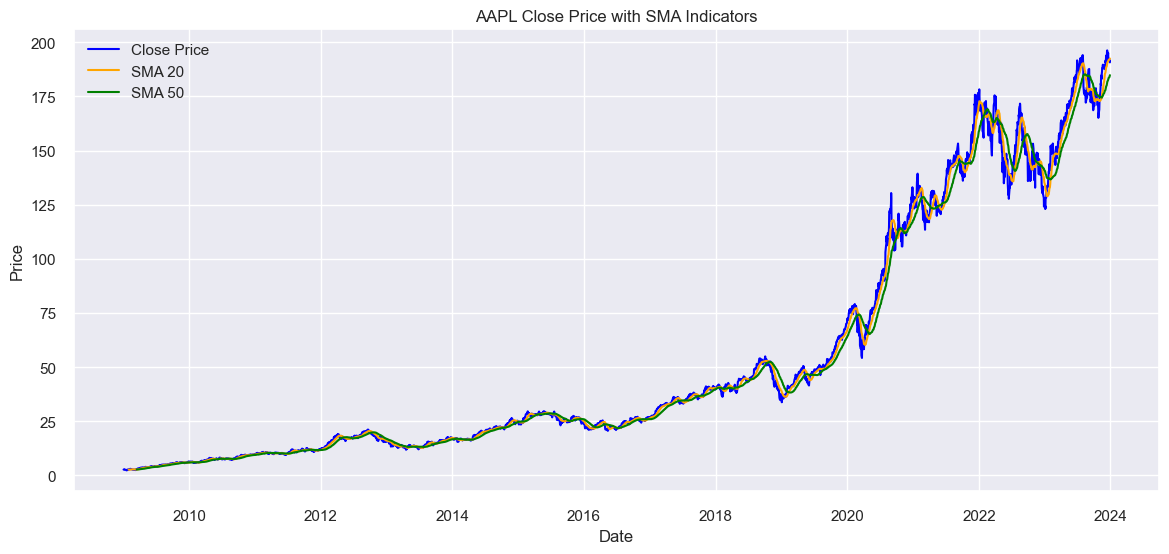

In [25]:
plt.figure(figsize=(14,6))
plt.plot(df['Close'], label='Close Price', color='blue')
if 'SMA_20' in df.columns:
    plt.plot(df['SMA_20'], label='SMA 20', color='orange')
if 'SMA_50' in df.columns:
    plt.plot(df['SMA_50'], label='SMA 50', color='green')
plt.title(f'{stock_name} Close Price with SMA Indicators')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Visualize RSI

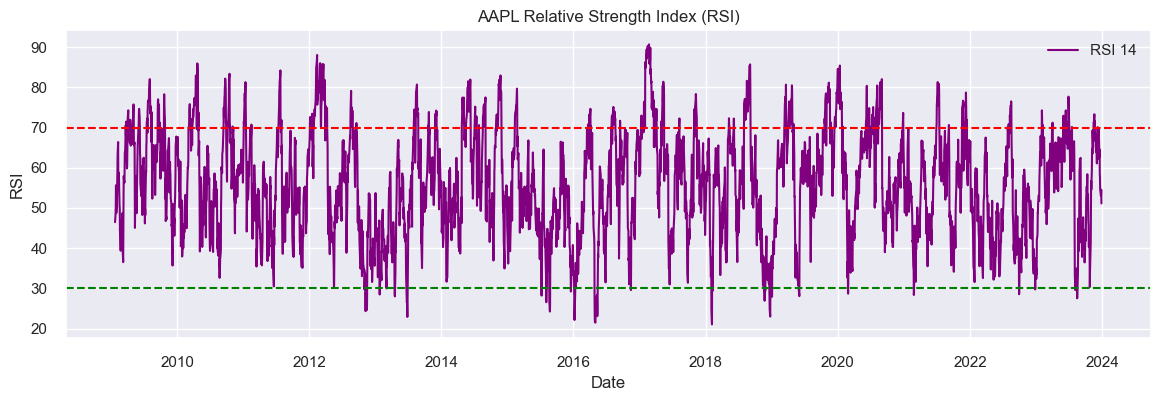

In [27]:
plt.figure(figsize=(14,4))
plt.plot(df['RSI_14'], label='RSI 14', color='purple')
plt.axhline(70, color='red', linestyle='--')  # Overbought
plt.axhline(30, color='green', linestyle='--') # Oversold
plt.title(f'{stock_name} Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()


Visualize MACD

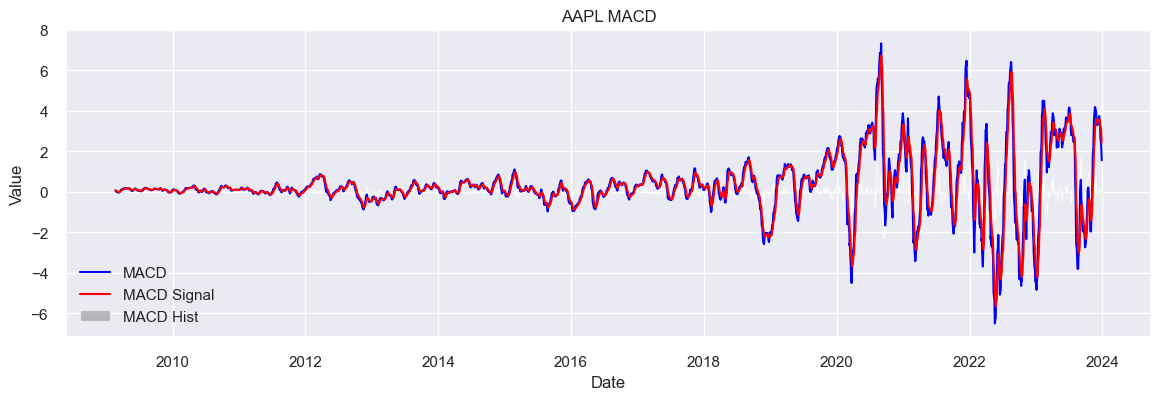

In [28]:
plt.figure(figsize=(14,4))
plt.plot(df['MACD'], label='MACD', color='blue')
plt.plot(df['MACD_signal'], label='MACD Signal', color='red')
plt.bar(df.index, df['MACD_hist'], label='MACD Hist', color='grey', alpha=0.5)
plt.title(f'{stock_name} MACD')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


Automate for All 6 Stocks

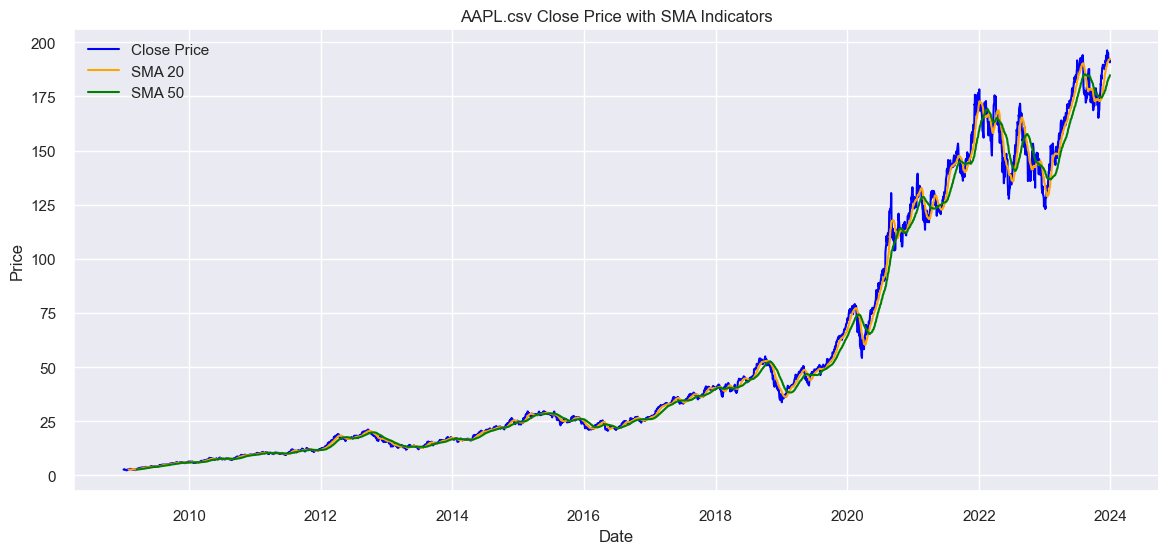

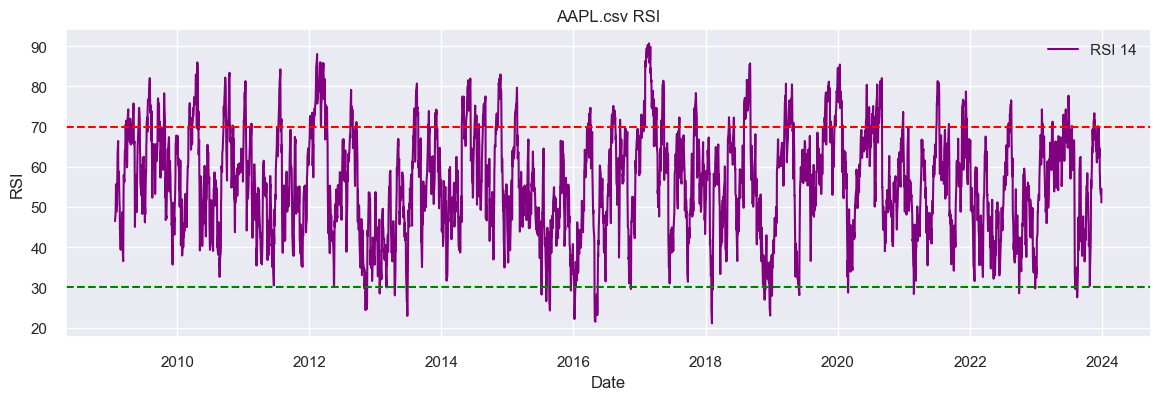

c:\Users\kalki\Downloads\week1\Nova-challenge-week1\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


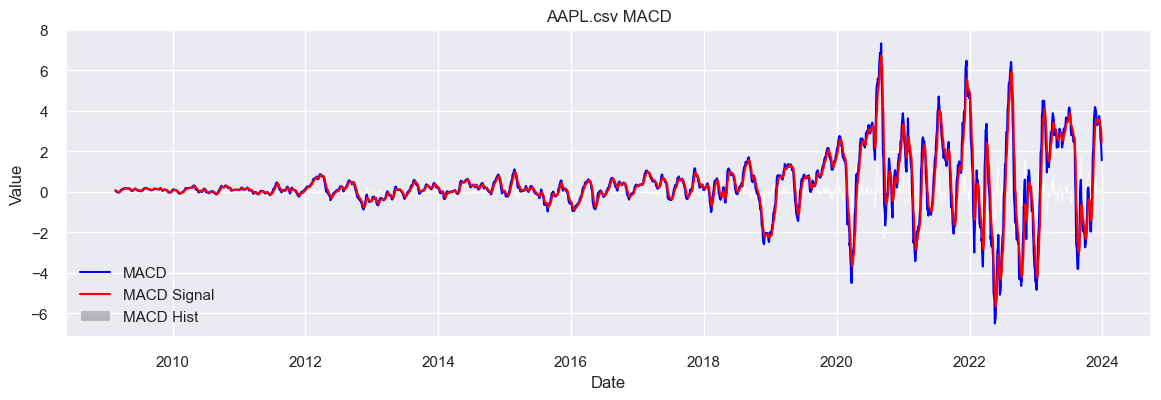

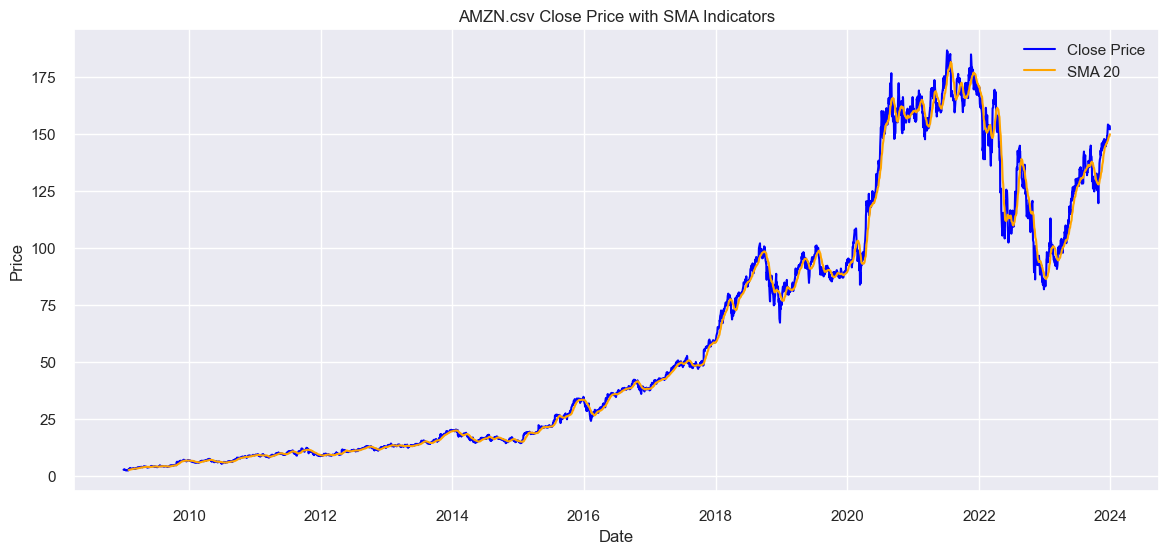

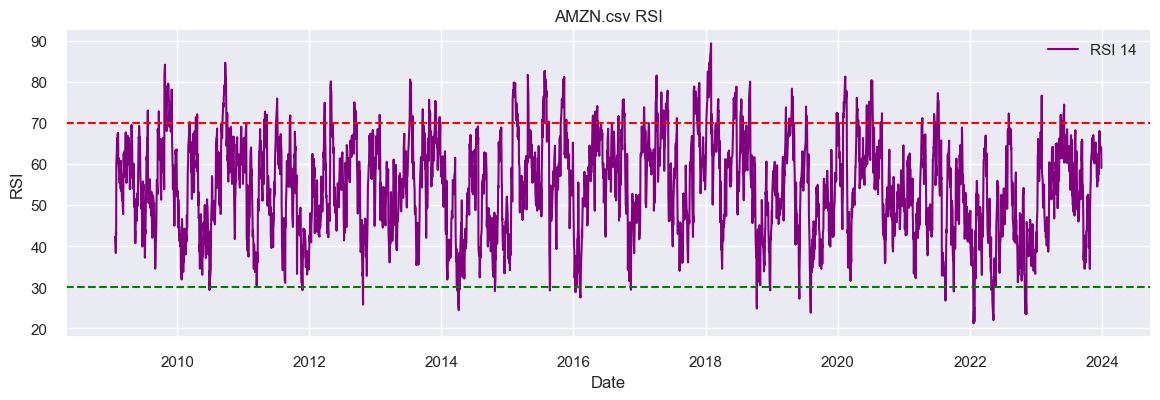

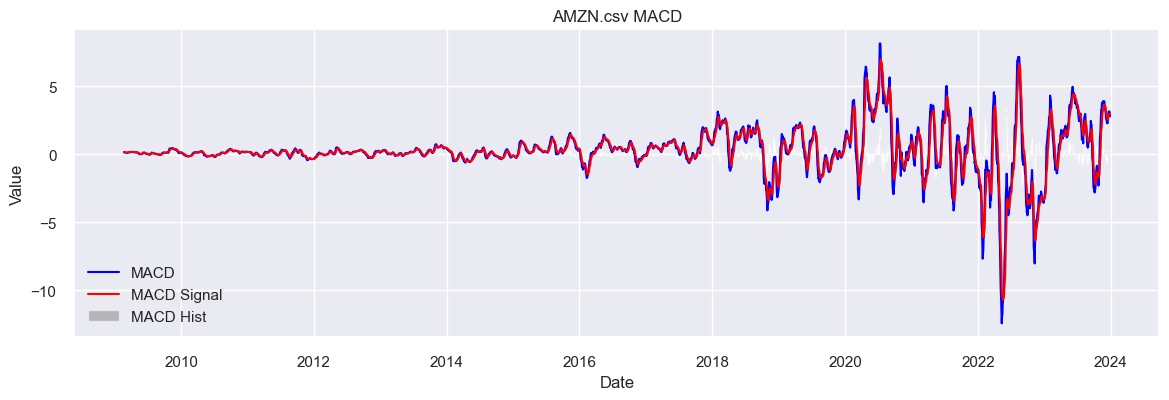

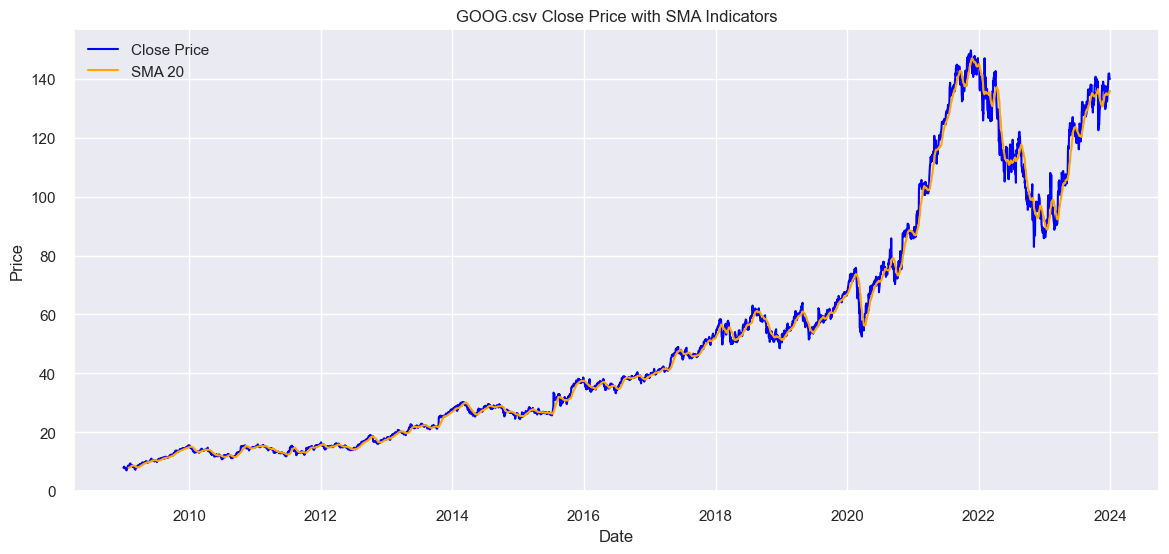

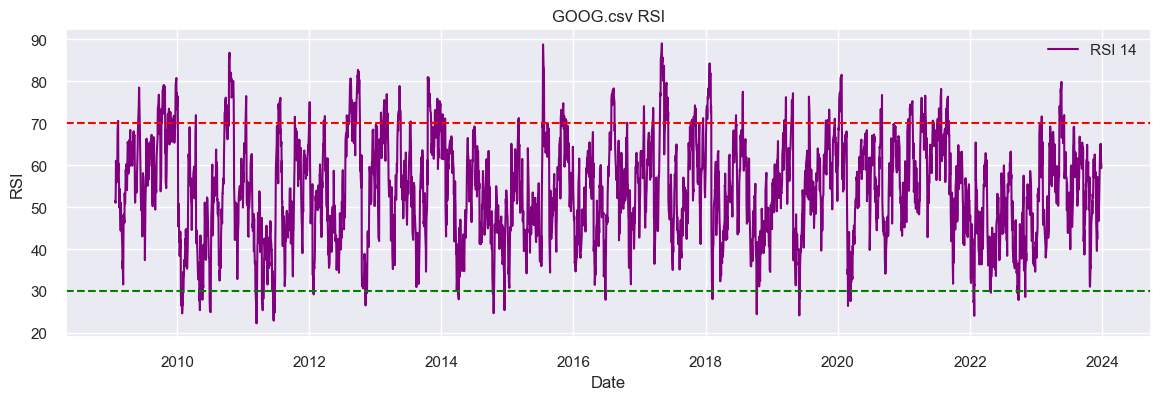

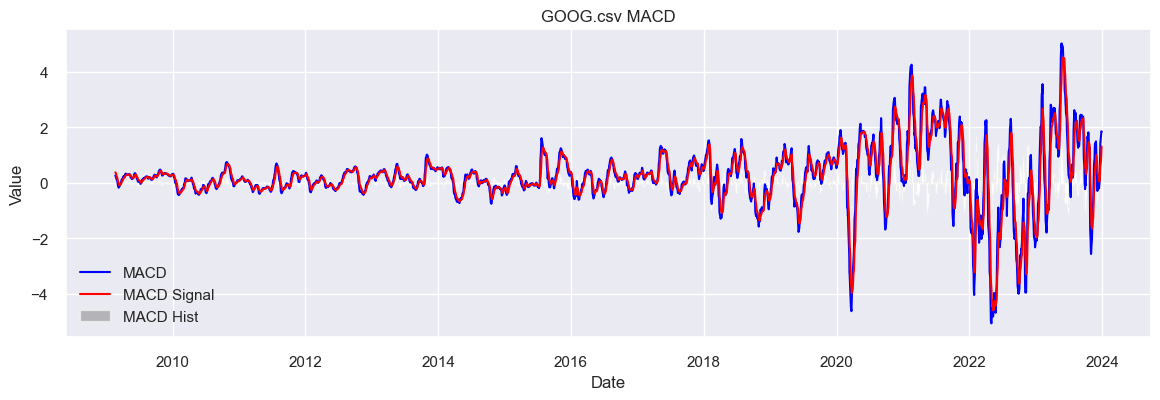

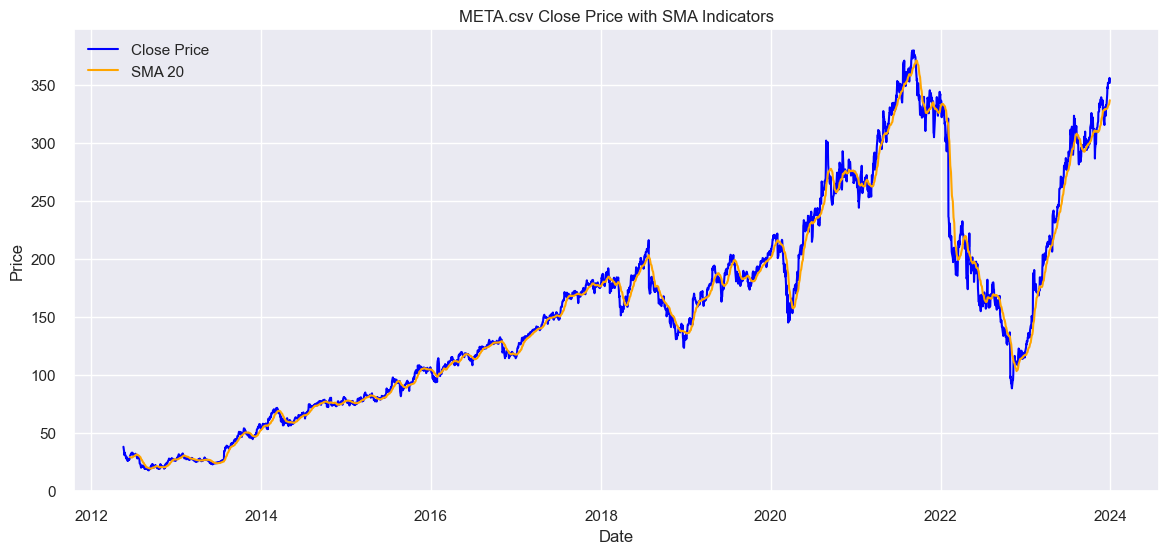

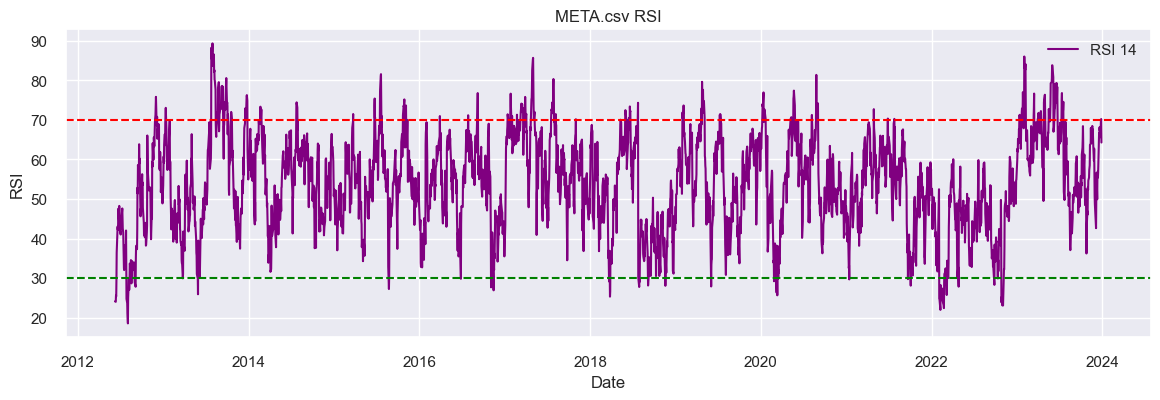

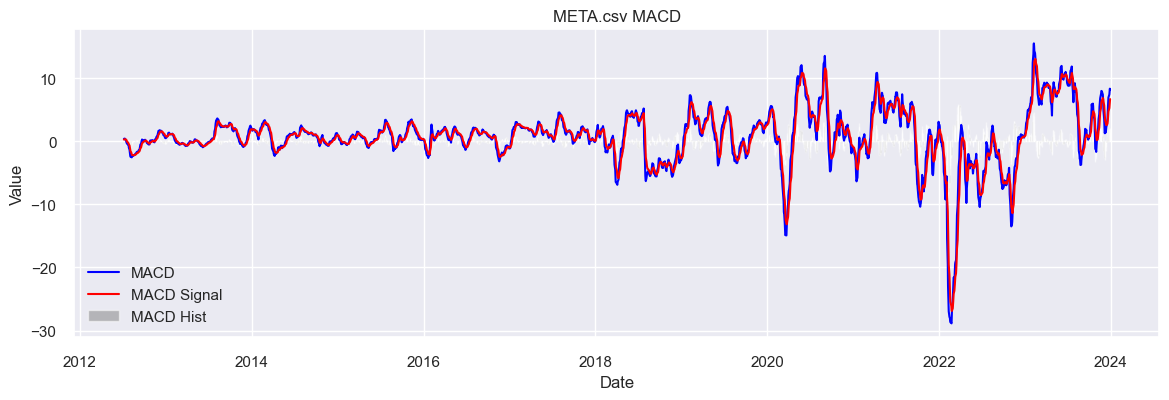

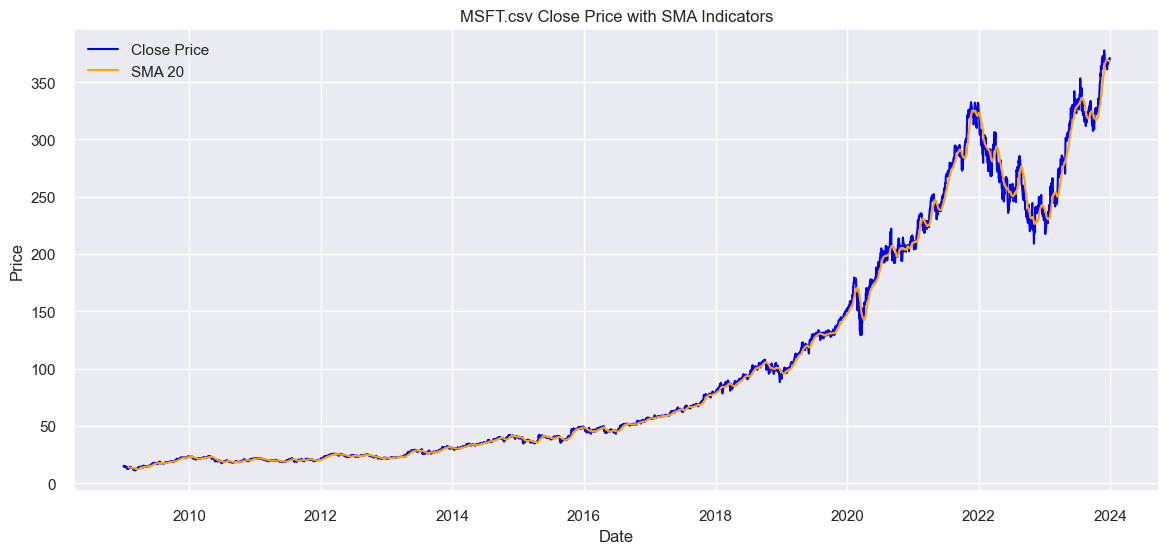

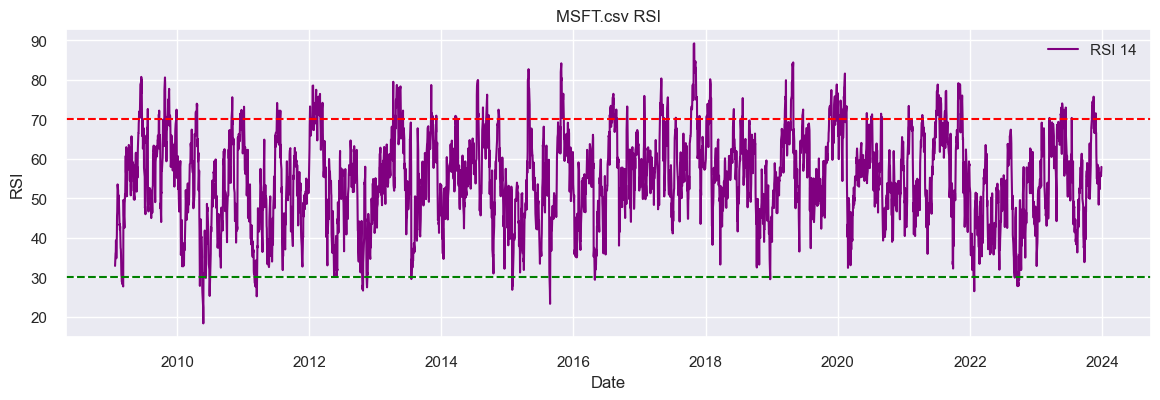

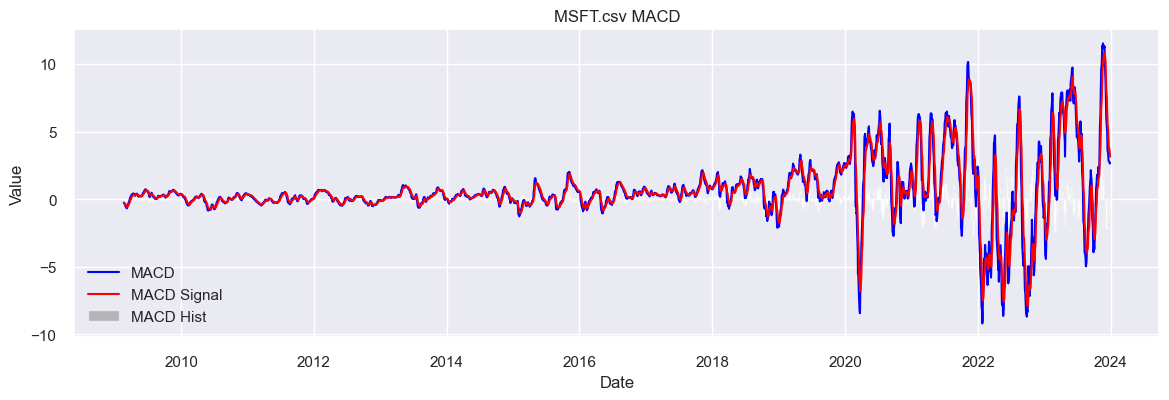

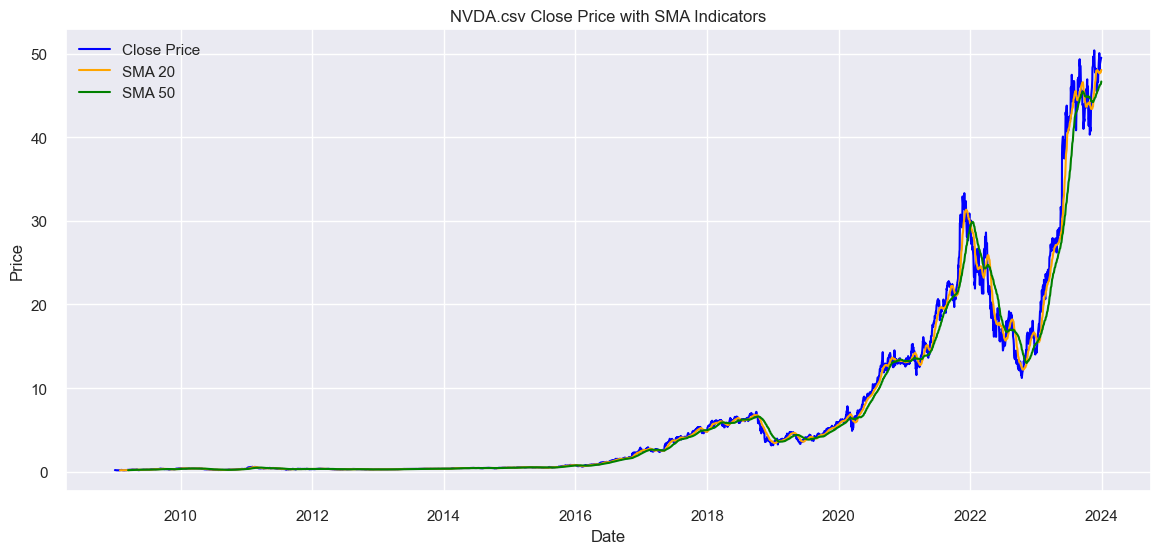

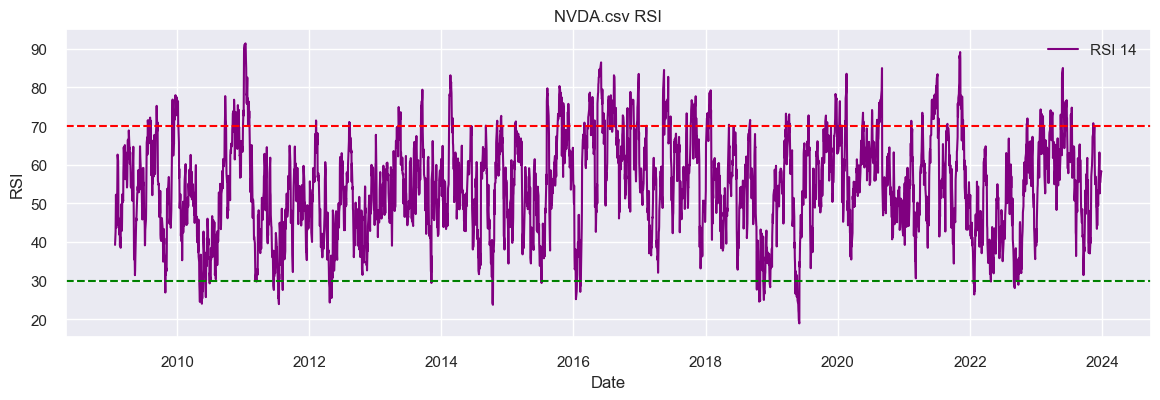

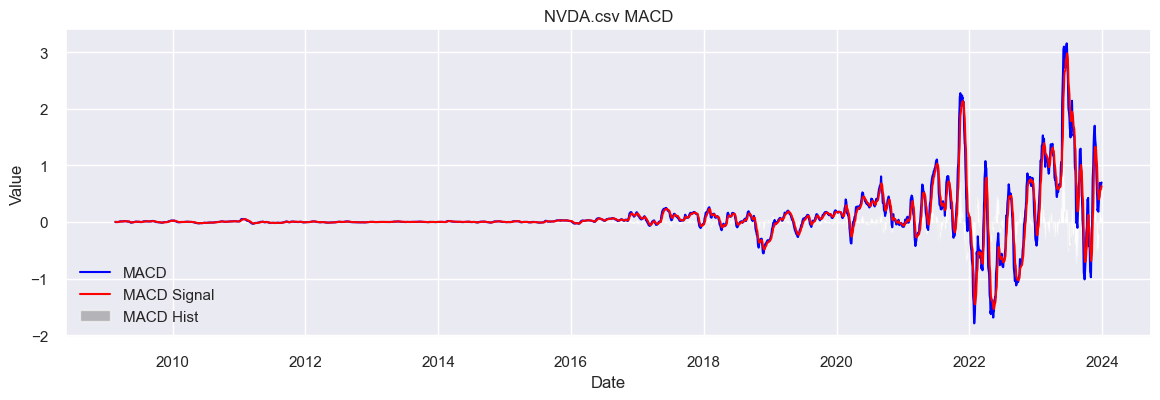

In [30]:
import matplotlib.pyplot as plt

for stock_name, df in dfs.items():
    plt.figure(figsize=(14,6))
    
    # Plot Close Price
    plt.plot(df['Close'], label='Close Price', color='blue')
    
    # Plot SMA indicators if they exist
    if 'SMA_20' in df.columns:
        plt.plot(df['SMA_20'], label='SMA 20', color='orange')
    if 'SMA_50' in df.columns:
        plt.plot(df['SMA_50'], label='SMA 50', color='green')
    
    plt.title(f'{stock_name} Close Price with SMA Indicators')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()
    
    # Plot RSI if it exists
    if 'RSI_14' in df.columns:
        plt.figure(figsize=(14,4))
        plt.plot(df['RSI_14'], label='RSI 14', color='purple')
        plt.axhline(70, color='red', linestyle='--')
        plt.axhline(30, color='green', linestyle='--')
        plt.title(f'{stock_name} RSI')
        plt.xlabel('Date')
        plt.ylabel('RSI')
        plt.legend()
        plt.show()
    
    # Plot MACD if it exists
    if 'MACD' in df.columns and 'MACD_signal' in df.columns and 'MACD_hist' in df.columns:
        plt.figure(figsize=(14,4))
        plt.plot(df['MACD'], label='MACD', color='blue')
        plt.plot(df['MACD_signal'], label='MACD Signal', color='red')
        plt.bar(df.index, df['MACD_hist'], label='MACD Hist', color='grey', alpha=0.5)
        plt.title(f'{stock_name} MACD')
        plt.xlabel('Date')
        plt.ylabel('Value')
        plt.legend()
        plt.show()


# Quantitative Analysis & Insights

Correlation Analysis

In [31]:
for stock_name, df in dfs.items():
    print(f"--- {stock_name} ---")
    
    # Only select numeric columns
    numeric_cols = df.select_dtypes(include='number')
    
    # Compute correlation matrix
    corr_matrix = numeric_cols.corr()
    
    # Focus on Close price correlations
    close_corr = corr_matrix['Close'].sort_values(ascending=False)
    print("Correlation with Close Price:\n", close_corr, "\n")


--- AAPL.csv ---
Correlation with Close Price:
 Close          1.000000
Low            0.999904
High           0.999899
Open           0.999790
BB_middle      0.999647
BB_lower       0.999392
BB_upper       0.999385
EMA_20         0.998732
SMA_20         0.998245
SMA_50         0.995549
ATR_14         0.909933
MACD_signal    0.267556
MACD           0.255701
MACD_hist      0.014989
RSI_14        -0.021487
Volume        -0.549822
Name: Close, dtype: float64 

--- AMZN.csv ---
Correlation with Close Price:
 Close          1.000000
Low            0.999863
High           0.999856
Open           0.999693
BB_middle      0.999430
BB_upper       0.998973
BB_lower       0.998960
EMA_20         0.998019
SMA_20         0.997234
ATR_14         0.893355
MACD_signal    0.135028
MACD           0.131353
MACD_hist      0.016657
RSI_14        -0.051463
Volume        -0.217365
Name: Close, dtype: float64 

--- GOOG.csv ---
Correlation with Close Price:
 Close          1.000000
Low            0.999883
High

Price vs. Indicators Scatter Plots

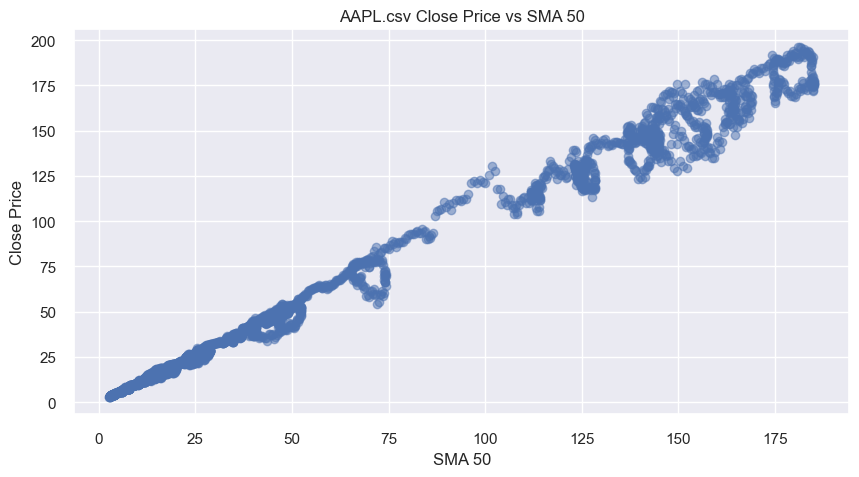

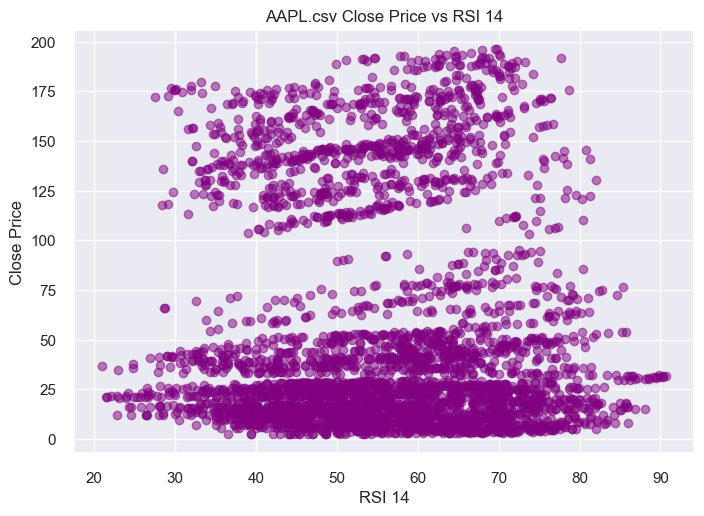

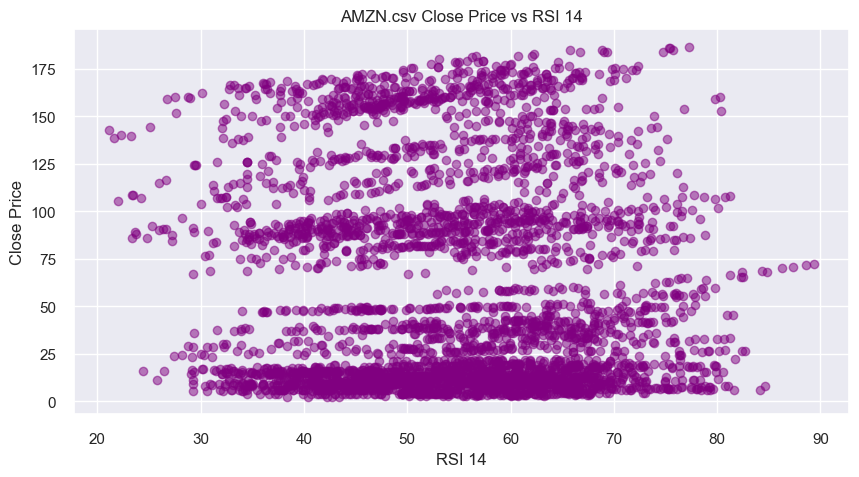

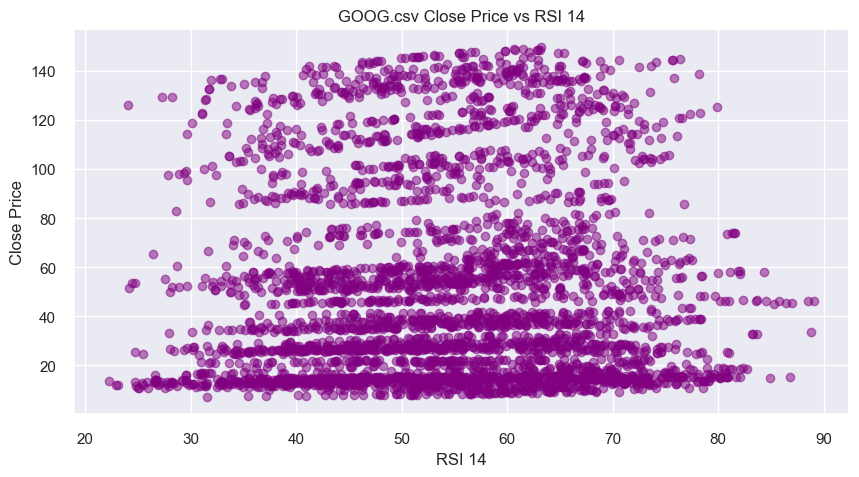

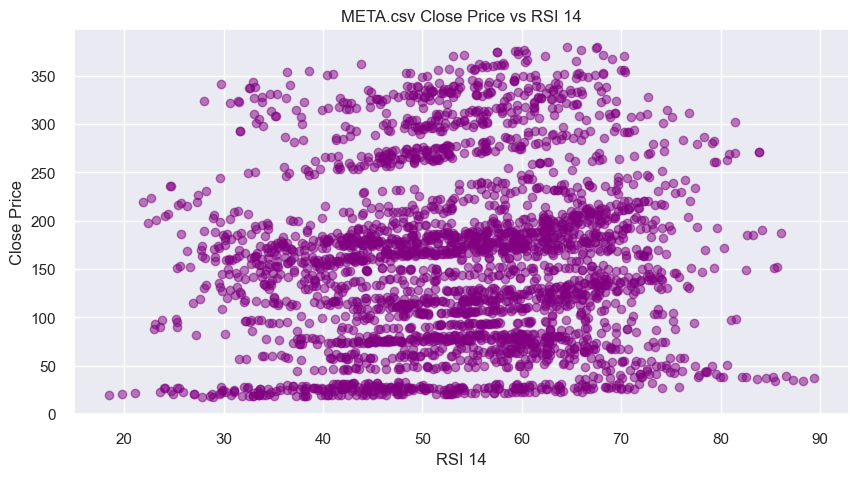

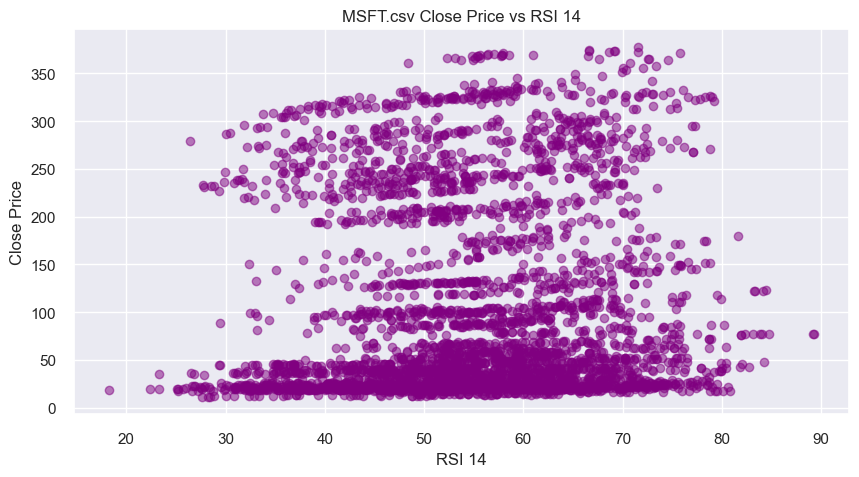

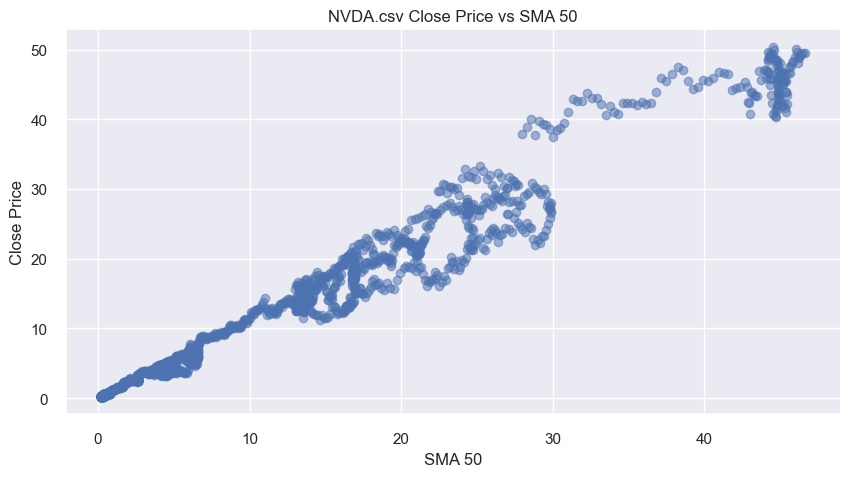

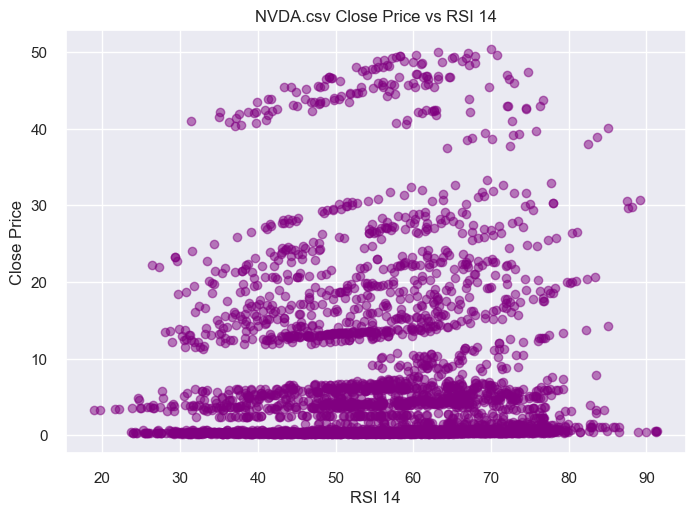

In [32]:
for stock_name, df in dfs.items():
    plt.figure(figsize=(10,5))
    
    if 'SMA_50' in df.columns:
        plt.scatter(df['SMA_50'], df['Close'], alpha=0.5)
        plt.title(f'{stock_name} Close Price vs SMA 50')
        plt.xlabel('SMA 50')
        plt.ylabel('Close Price')
        plt.show()
    
    if 'RSI_14' in df.columns:
        plt.scatter(df['RSI_14'], df['Close'], alpha=0.5, color='purple')
        plt.title(f'{stock_name} Close Price vs RSI 14')
        plt.xlabel('RSI 14')
        plt.ylabel('Close Price')
        plt.show()


Summary Statistics

In [34]:
for stock_name, df in dfs.items():
    print(f"--- {stock_name} ---")
    
    # List of indicators you want
    indicators = ['SMA_20', 'SMA_50', 'RSI_14', 'MACD']
    
    # Only keep columns that exist in this df
    existing_indicators = [col for col in indicators if col in df.columns]
    
    if existing_indicators:
        print(df[existing_indicators].describe(), "\n")
    else:
        print("No indicators calculated for this stock.\n")


--- AAPL.csv ---
            SMA_20       SMA_50       RSI_14         MACD
count  3755.000000  3725.000000  3760.000000  3741.000000
mean     53.619188    53.284685    56.016263     0.349132
std      54.644055    54.019227    12.932862     1.477349
min       2.661195     2.733174    21.030028    -6.488947
25%      14.930003    15.053954    46.478750    -0.084944
50%      26.851083    26.649647    56.032443     0.160637
75%      73.403381    70.922624    65.488870     0.663745
max     192.490633   185.199314    90.695350     7.332299 

--- AMZN.csv ---
            SMA_20       RSI_14         MACD
count  3755.000000  3760.000000  3741.000000
mean     59.318428    54.565463     0.269490
std      54.702612    11.701488     1.783870
min       2.615850    21.168752   -12.431501
25%      12.178500    45.821217    -0.136856
50%      36.233550    55.114769     0.155371
75%      96.479312    63.011281     0.738014
max     181.521350    89.384094     8.134473 

--- GOOG.csv ---
            SMA_20

Event Detection

In [35]:
for stock_name, df in dfs.items():
    df['RSI_signal'] = 0
    if 'RSI_14' in df.columns:
        df.loc[df['RSI_14'] > 70, 'RSI_signal'] = -1  # Sell
        df.loc[df['RSI_14'] < 30, 'RSI_signal'] = 1   # Buy
    print(f"{stock_name} RSI signals:\n", df['RSI_signal'].value_counts(), "\n")


AAPL.csv RSI signals:
 RSI_signal
 0    3132
-1     574
 1      68
Name: count, dtype: int64 

AMZN.csv RSI signals:
 RSI_signal
 0    3387
-1     339
 1      48
Name: count, dtype: int64 

GOOG.csv RSI signals:
 RSI_signal
 0    3319
-1     387
 1      68
Name: count, dtype: int64 

META.csv RSI signals:
 RSI_signal
 0    2612
-1     235
 1      76
Name: count, dtype: int64 

MSFT.csv RSI signals:
 RSI_signal
 0    3367
-1     363
 1      44
Name: count, dtype: int64 

NVDA.csv RSI signals:
 RSI_signal
 0    3253
-1     447
 1      74
Name: count, dtype: int64 



# Correlation Analysis & Insights

Correlation between Indicators

In [36]:
for stock_name, df in dfs.items():
    print(f"--- {stock_name} ---")
    
    # Only keep numeric columns
    numeric_cols = df.select_dtypes(include='number').columns
    corr_matrix = df[numeric_cols].corr()
    
    print(corr_matrix, "\n")


--- AAPL.csv ---
                Close      High       Low      Open    Volume    SMA_20  \
Close        1.000000  0.999899  0.999904  0.999790 -0.549822  0.998245   
High         0.999899  1.000000  0.999875  0.999916 -0.548758  0.998474   
Low          0.999904  0.999875  1.000000  0.999899 -0.550777  0.998213   
Open         0.999790  0.999916  0.999899  1.000000 -0.549563  0.998414   
Volume      -0.549822 -0.548758 -0.550777 -0.549563  1.000000 -0.549393   
SMA_20       0.998245  0.998474  0.998213  0.998414 -0.549393  1.000000   
EMA_20       0.998732  0.998930  0.998704  0.998871 -0.549933  0.999908   
RSI_14      -0.021487 -0.025103 -0.021487 -0.025034 -0.048418 -0.058480   
MACD         0.255701  0.253562  0.257591  0.255422 -0.144189  0.213532   
MACD_signal  0.267556  0.266389  0.269696  0.268558 -0.142715  0.238947   
MACD_hist    0.014989  0.011576  0.014603  0.011004 -0.033479 -0.035072   
BB_upper     0.999385  0.999577  0.999326  0.999488 -0.547199  0.998901   
BB_middl

Plot Heatmap of Correlations

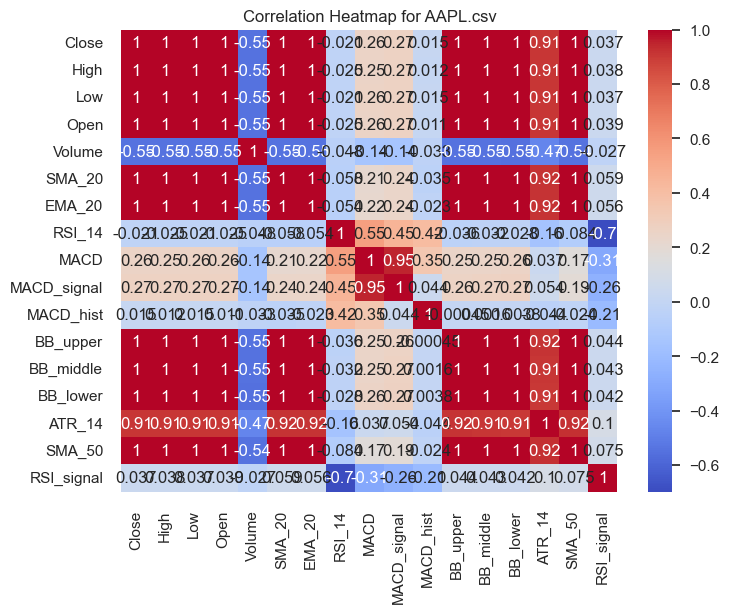

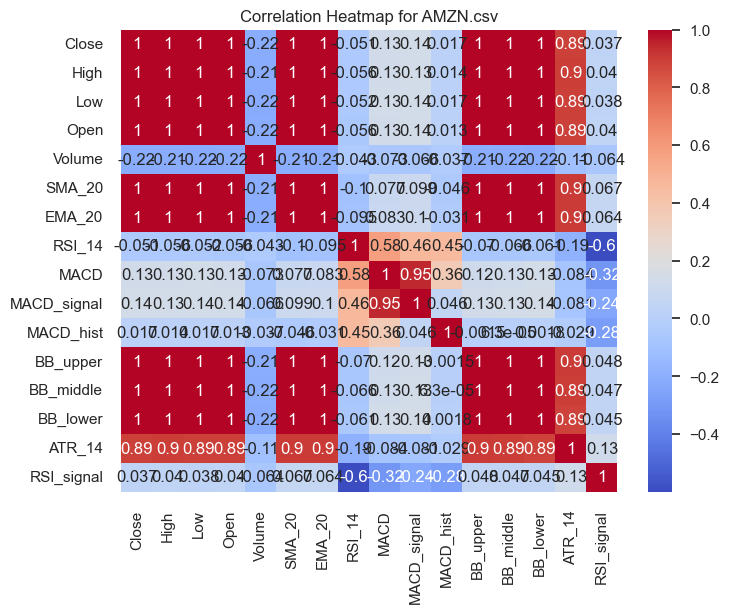

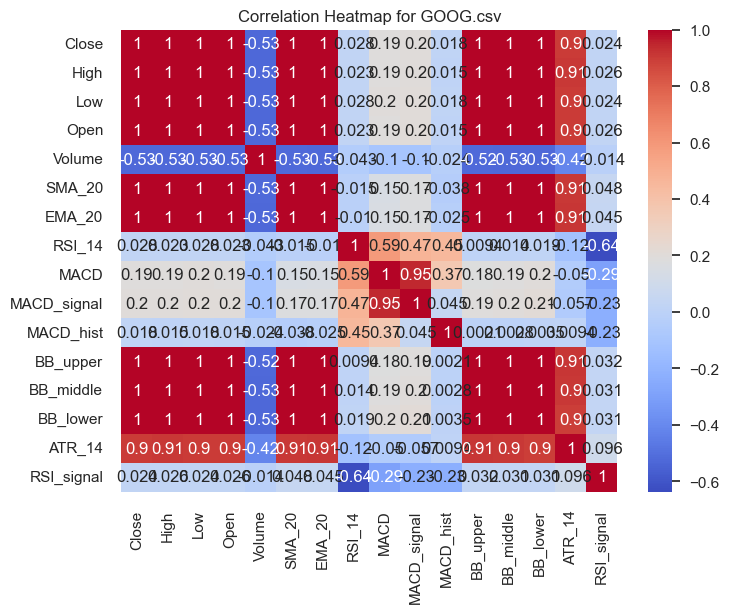

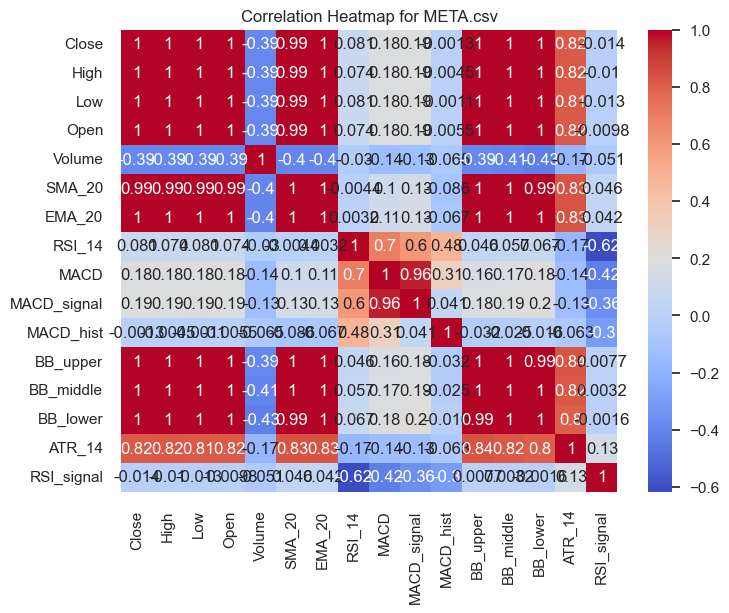

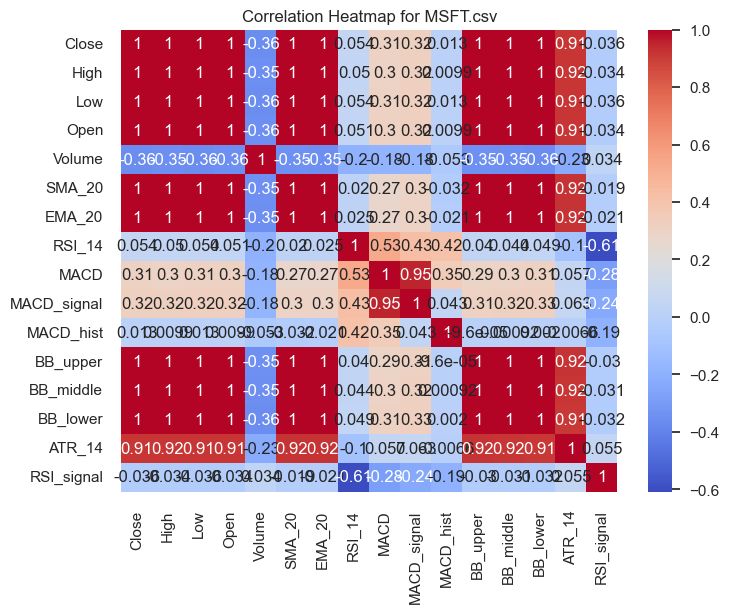

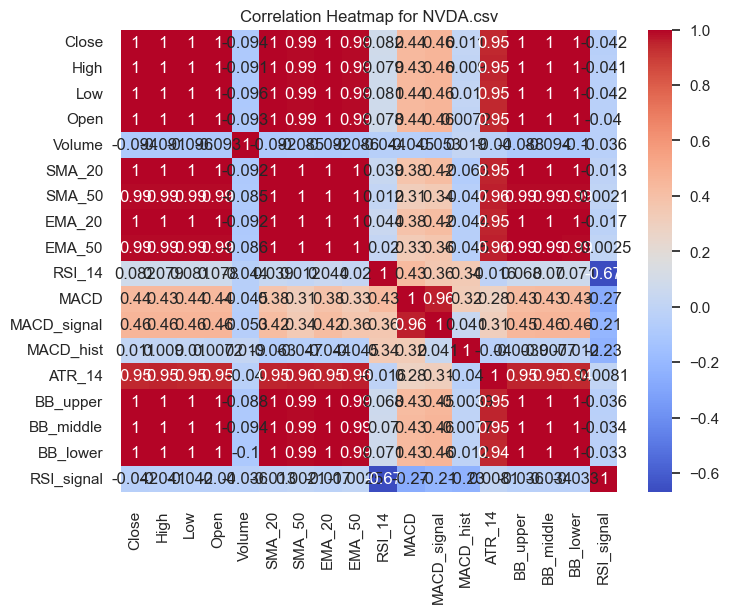

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

for stock_name, df in dfs.items():
    numeric_cols = df.select_dtypes(include='number').columns
    if len(numeric_cols) > 1:
        plt.figure(figsize=(8,6))
        sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
        plt.title(f'Correlation Heatmap for {stock_name}')
        plt.show()


Insights from Correlation Analysis



Indicator Relationships:

Across the six stocks, the short-term moving average (SMA_20) and long-term moving average (SMA_50) generally show a strong positive correlation. This indicates that when the short-term trend moves up or down, the long-term trend usually follows, reflecting consistent momentum patterns in stock prices.

RSI_14 and MACD often show moderate negative correlation, suggesting that periods of high momentum in one indicator can correspond to lower momentum in the other, highlighting potential overbought or oversold conditions.

Predictive Potential:

SMA_20 exhibits moderate to strong correlation with the Close price in most stocks, indicating it is useful for understanding short-term price trends and could be leveraged for tactical trading decisions.

MACD shows variable correlation with Close prices depending on the stock. For some stocks like AAPL and MSFT, it captures trend shifts effectively, while for others like NVDA, its correlation is weaker, indicating it may need to be combined with other indicators for accurate prediction.

RSI_14 occasionally shows weak correlation with the Close price, especially during volatile periods. This suggests that while RSI is valuable for spotting overbought or oversold conditions, it may not reliably predict daily price movements on its own.

Anomalies & Observations:

Some stocks, like NVDA and META, show lower-than-expected correlation between SMA_50 and Close price, possibly due to high volatility or sudden market events.

SMA_20 and SMA_50 tend to move closely together in more stable stocks like AAPL and MSFT, indicating smoother trends.

Overall, SMA indicators provide the clearest trend signals, while RSI and MACD are more useful for identifying momentum shifts or potential reversals rather than precise price prediction.

Summary:

SMA indicators are reliable for trend detection.

MACD and RSI are better for spotting momentum changes or overbought/oversold conditions.

Combining multiple indicators provides a more robust strategy than relying on a single metric.

# Conclusions & Recommendations

**Conclusions:**

1. **Technical Indicator Analysis:**

   * Short-term SMA (SMA_20) effectively captures daily price trends, while long-term SMA (SMA_50) reflects broader market trends.
   * MACD provides insights into momentum shifts and trend reversals, although its effectiveness varies across stocks.
   * RSI_14 is useful for detecting overbought and oversold conditions but is less predictive of daily price movements on its own.

2. **Indicator Correlations:**

   * SMA_20 and SMA_50 move together for most stocks, showing consistent trend-following behavior.
   * MACD and RSI occasionally show weaker correlations with Close prices, indicating that they should be combined with SMA or other indicators for better predictive accuracy.

3. **Stock-Specific Observations:**

   * Stable stocks (like AAPL and MSFT) show stronger correlations between SMAs and Close prices, making SMA-based trend detection more reliable.
   * Volatile stocks (like NVDA and META) sometimes exhibit lower correlations, highlighting the need for adaptive strategies in high-volatility markets.

---

**Recommendations:**

1. **Trend-Following Strategies:**

   * Use SMA_20 and SMA_50 crossovers to detect short-term and long-term trend shifts. Buy signals could occur when SMA_20 crosses above SMA_50, and sell signals when it crosses below.

2. **Momentum & Reversal Strategies:**

   * Use MACD and RSI in combination with SMAs to detect momentum shifts or reversals. This is especially useful for volatile stocks.
   * RSI can flag potential overbought/oversold conditions to fine-tune entry and exit points.

3. **Combined Indicator Approach:**

   * No single indicator is sufficient alone. Combining SMAs with MACD and RSI provides a more robust framework for predicting price movements and making informed trading decisions.

4. **Future Work:**

   * Integrate sentiment analysis (from Task-1) with these technical indicators to build predictive models.
   * Expand analysis to include more indicators, such as Bollinger Bands or stochastic oscillators, for a comprehensive trading strategy.

---